In [22]:
import mglearn.datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
citibike = mglearn.datasets.load_citibike()

In [3]:
citibike

starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
                       ..
2015-08-31 09:00:00    16
2015-08-31 12:00:00     8
2015-08-31 15:00:00    17
2015-08-31 18:00:00    22
2015-08-31 21:00:00     7
Freq: 3H, Name: one, Length: 248, dtype: int64

Text(0, 0.5, 'Rentals')

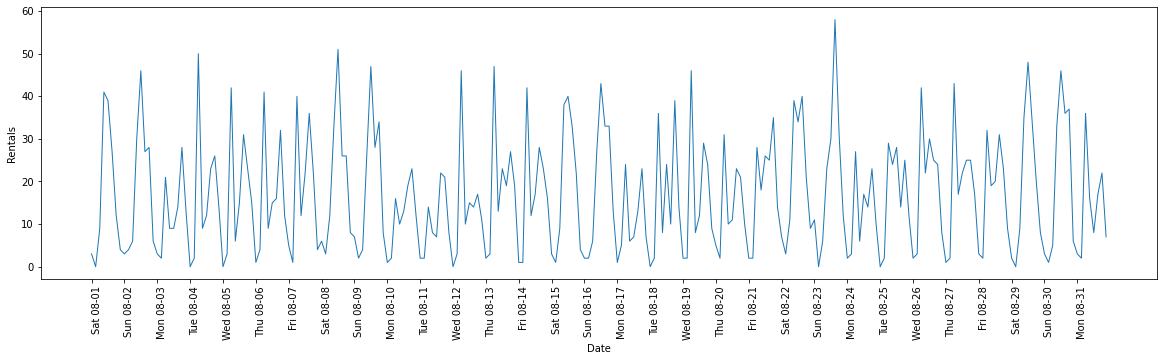

In [4]:
plt.figure(figsize=(20, 5))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(),
freq='D')
plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel("Date")
plt.ylabel("Rentals")

In [56]:
y = citibike.values
x = citibike.index.astype('int') // 10**9
x = x.values.reshape(-1,1)

In [61]:
n_train = 184

def eval_on_features(features, target, regressor):
    x_train, x_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(x_train, y_train)
    print('test set R^2: ' ,regressor.score(x_test, y_test))
    y_pred = regressor.predict(x_test)
    y_pred_train = regressor.predict(x_train)
    
    plt.figure(figsize=(20, 5))
    plt.xticks(range(0, len(features), 8), xticks.strftime("%a %m-%d"), rotation=90, ha="left")
    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
    plt.plot(range(n_train), y_pred_train, '--', label="prediction train")
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label="prediction test")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("Date")
    plt.ylabel("Rentals")

test set R^2:  -0.0518782786787646


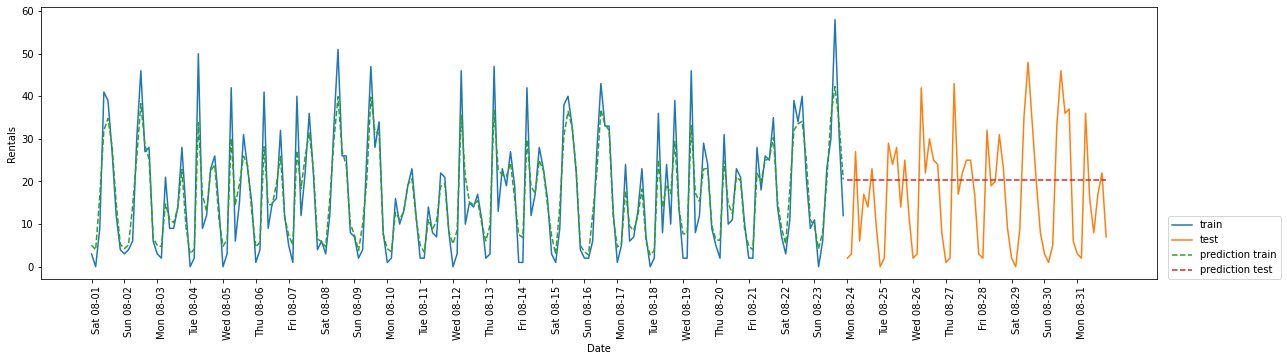

In [72]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
eval_on_features(x,y,rf)

test set R^2:  0.603778638953898


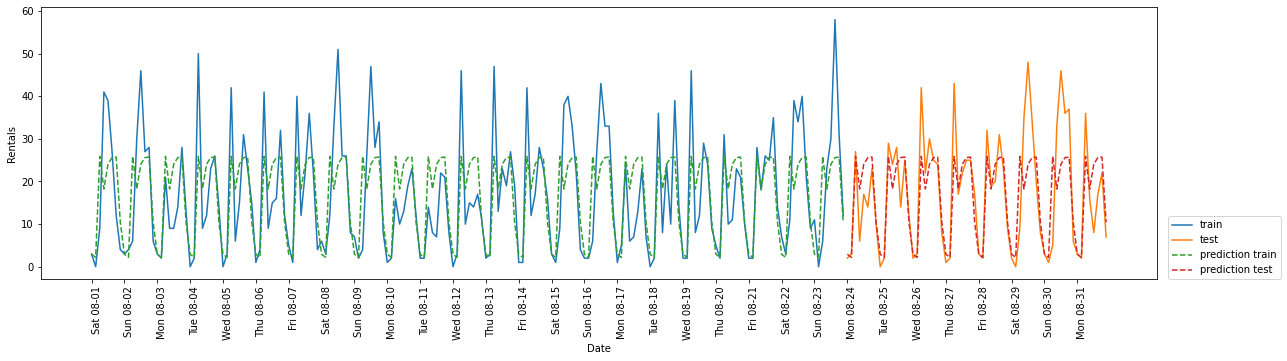

In [79]:
x = citibike.index.hour.astype('int').values.reshape(-1,1)
eval_on_features(x,y,rf)

test set R^2:  0.8424136702980602


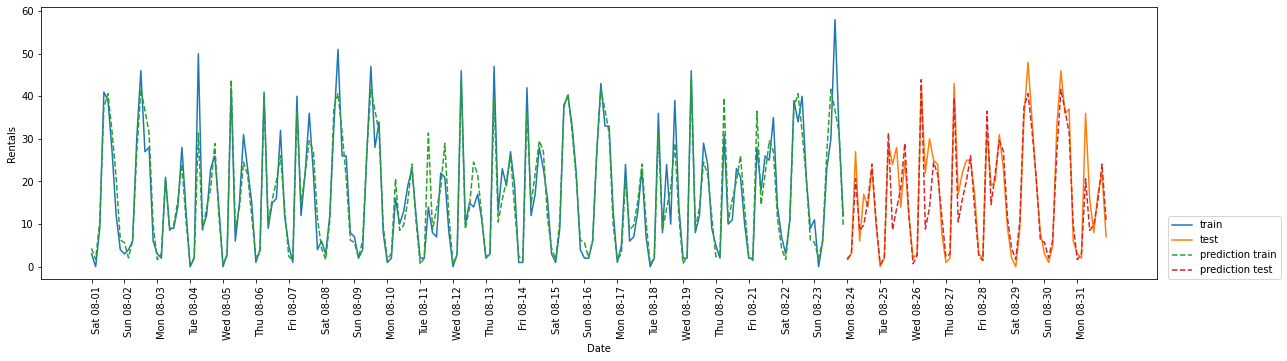

In [81]:
x_hr_week = np.hstack((
    citibike.index.hour.astype('int').values.reshape(-1,1),
    citibike.index.day_of_week.astype('int').values.reshape(-1,1)
    ))
eval_on_features(x_hr_week,y,rf)